In [1]:
import tensorflow as tf
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
# def rotate_images(input_folder, output_folder):
    
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)
    
#     for filename in os.listdir(input_folder):
#         filepath = os.path.join(input_folder, filename)
        
#         try:
#             # Otwórz obraz
#             with Image.open(filepath) as img:
#                 # Utwórz rotacje i zapisz każdą z nich
#                 for angle in [0, 90, 180, 270]:
#                     rotated_img = img.rotate(angle, expand=True)
                    
                    
#                     rotated_filename = f"{os.path.splitext(filename)[0]}_{angle}.png"
#                     rotated_filepath = os.path.join(output_folder, rotated_filename)
                    
                    
#                     rotated_img.save(rotated_filepath)
#                     #print(f"Obraz zapisany: {rotated_filepath}")
        
#         except Exception as e:
#             #print(f"Błąd podczas przetwarzania pliku {filename}: {e}")

# #input_folder = r"C:\Users\ppwks\Studia\Programowanie\Sem_II\Glebokie_sieci_neuronowe\new-images\disgust"
# #output_folder = r"C:\Users\ppwks\Studia\Programowanie\Sem_II\Glebokie_sieci_neuronowe\new-images-augmented\disgust"


# #rotate_images(input_folder, output_folder)


In [32]:
# Set environment variables before importing TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging (INFO and WARNING messages)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Turn off oneDNN custom operations

# Set TensorFlow logger to only show errors
tf.get_logger().setLevel('ERROR')

data_dir = r'C:\Users\jakub\Visual Studio Code sem2\DNN\new-images_4000_i_d_augmented'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [33]:
# Load dataset
data = tf.keras.utils.image_dataset_from_directory(data_dir, color_mode='grayscale', image_size=(48, 48))
data = data.map(lambda x, y: (x / 255, y))
data = data.shuffle(buffer_size=len(list(data)), seed=42)

# Split dataset
data_size = len(list(data))
train_size = int(data_size * 0.7)
val_size = int(data_size * 0.2)
test_size = int(data_size * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Found 26188 files belonging to 7 classes.


In [34]:
# Build Deep Learning Model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')  # 7 output units for 7 emotions
])

model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

c:\Users\jakub\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,015 (300.84 KB)

 Trainable params: 77,015 (300.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/55
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.2189 - loss: 1.8622 - val_accuracy: 0.3800 - val_loss: 1.5982
Epoch 2/55
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.4021 - loss: 1.5465 - val_accuracy: 0.4434 - val_loss: 1.4502
Epoch 3/55
573/573 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.4477 - loss: 1.4496 - val_accuracy: 0.4969 - val_loss: 1.3289
Epoch 4/55
573/573 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.4851 - loss: 1.3672 - val_accuracy: 0.5102 - val_loss: 1.2921
Epoch 5/55
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.5104 - loss: 1.2931 - val_accuracy: 0.5222 - val_loss: 1.2576
Epoch 6/55
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.5241 - loss: 1.2503 - val_accuracy: 0.5431 - val_loss: 1.1986
Epoch 7/55
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.5498 - loss: 1.2034 - val_accuracy: 0.5699 - val_loss: 1.1624
Epoch 8/55
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.5606 - loss: 1.1722 - 

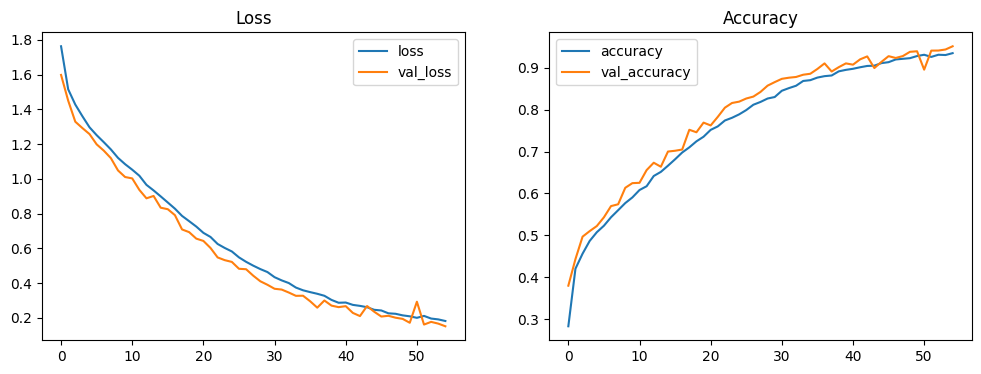

In [35]:
# Train the model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Ensure train and val datasets are properly defined
train = train.prefetch(tf.data.experimental.AUTOTUNE)
val = val.prefetch(tf.data.experimental.AUTOTUNE)
try:
    hist = model.fit(train, epochs=55, validation_data=val)
except tf.errors.OutOfRangeError as e:
    print("OutOfRangeError: ", e)
except Exception as e:
    print("An error occurred during training:", e)
    hist = None

if hist:
    # Plot Performance
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(hist.history['loss'], label='loss')
    ax[0].plot(hist.history['val_loss'], label='val_loss')
    ax[0].legend()
    ax[0].set_title('Loss')

    ax[1].plot(hist.history['accuracy'], label='accuracy')
    ax[1].plot(hist.history['val_accuracy'], label='val_accuracy')
    ax[1].legend()
    ax[1].set_title('Accuracy')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

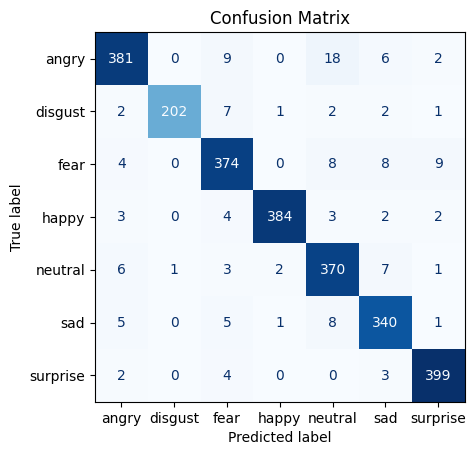

In [36]:
# Ewaluacja modelu
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
true_labels = []
predicted_labels = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    yhat = np.argmax(yhat, axis=1)  # Konwersja przewidywań na klasy
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    true_labels.extend(y)
    predicted_labels.extend(yhat)

true = labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

cm = confusion_matrix(true_labels, predicted_labels)
emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Obliczanie F1-Score na podstawie Precision i Recall
precision = pre.result().numpy()
recall = re.result().numpy()
if precision + recall > 0:  # Unikamy dzielenia przez zero
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0.0

# Wyniki
accuracy = acc.result().numpy()
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}, F1 Score: {f1_score}")

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = emotion_labels)
disp.plot(cmap = plt.cm.Blues, colorbar = False)
plt.title("Confusion Matrix")
plt.show()

# # Evaluate the model
# pre = Precision()
# re = Recall()
# acc = CategoricalAccuracy()

# for batch in test.as_numpy_iterator():
#     X, y = batch
#     yhat = model.predict(X)
#     yhat = np.argmax(yhat, axis=1)  # Convert predictions to class labels
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)

# print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

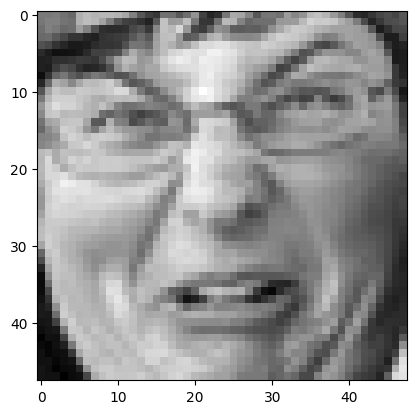

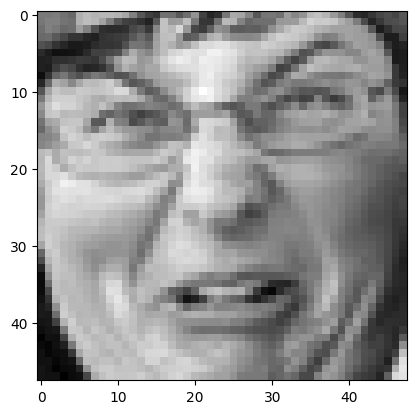

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[1]
Predicted class is disgust


In [99]:
# Test
img_path = r'C:\Users\jakub\Visual Studio Code sem2\DNN\new-images-augmented\disgust\299_0.png'
if os.path.exists(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, cmap='gray')
    plt.show()

    # Expand dimensions to add a channel dimension
    img = np.expand_dims(img, axis=-1)
    resize = tf.image.resize(img, (48, 48))
    plt.imshow(resize.numpy().astype(int).squeeze(), cmap='gray')
    plt.show()

    yhat = model.predict(np.expand_dims(resize / 255.0, 0))
    yhat = np.argmax(yhat, axis=1)  # Convert prediction to class label
    print(yhat)

    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    predicted_class = emotion_labels[yhat[0]]
    print(f'Predicted class is {predicted_class}')
else:
    print(f'Image {img_path} not found.')

In [100]:
# Save the Model
model.save(os.path.join('models', 'imageclassifier.h5'))
new_model = load_model('models/imageclassifier.h5')
print(new_model.predict(np.expand_dims(resize / 255.0, 0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[[8.7915957e-03 9.6246111e-01 1.7379528e-03 1.0257415e-02 4.3266363e-07
  1.3377237e-04 1.6617745e-02]]
